# Import Libraries

In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## 1. Read the Training Data

In [3]:
file_path=r"C:\Users\Souvik Karmakar\OneDrive - kiit.ac.in\Desktop\Flight Price Prediction (sagemaker)\data\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[:, col],dayfirst=True,format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-06-07 08:55:00,2024-06-07 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-07 17:30:00,2024-06-07 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-06-07 11:40:00,2024-06-07 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-06-07 09:25:00,2024-06-07 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-06-07 22:55:00,2024-06-07 07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-07 10:45:00,2024-06-07 18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,2024-06-07 09:25:00,2024-06-07 18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-06-07 14:00:00,2024-06-07 19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-06-07 07:55:00,2024-06-07 13:25:00,330,1.0,No Info,6152


In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 2. High-level Summary of the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [8]:
#High level Descriptive statistics for numerical variables
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [9]:
#total_stops we can consider it as categorical 
# Descriptive Statistics for object variables
(
    train
    .assign(total_stops=train.total_stops.astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2730,2730,3580.0,5249


## 4. High-level Analysis of Missing Values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


In [11]:
train.total_stops.fillna("0",inplace=True)

C:\Users\Souvik Karmakar\AppData\Local\Temp\ipykernel_12980\2325620208.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.total_stops.fillna("0",inplace=True)


## 5. High-level Analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
) # we can check this are genuine outliers are not by checking each and every features individually

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-06-07 18:55:00,2024-06-07 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-06-07 05:45:00,2024-06-07 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-06-07 23:05:00,2024-06-07 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-06-07 14:05:00,2024-06-07 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-06-07 21:25:00,2024-06-07 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-06-07 21:25:00,2024-06-07 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-06-07 09:10:00,2024-06-07 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-07 10:45:00,2024-06-07 18:50:00,1925,2.0,No Info,11093,-1
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-06-07 07:55:00,2024-06-07 13:25:00,330,1.0,No Info,6152,-1


## 6. Pair plots

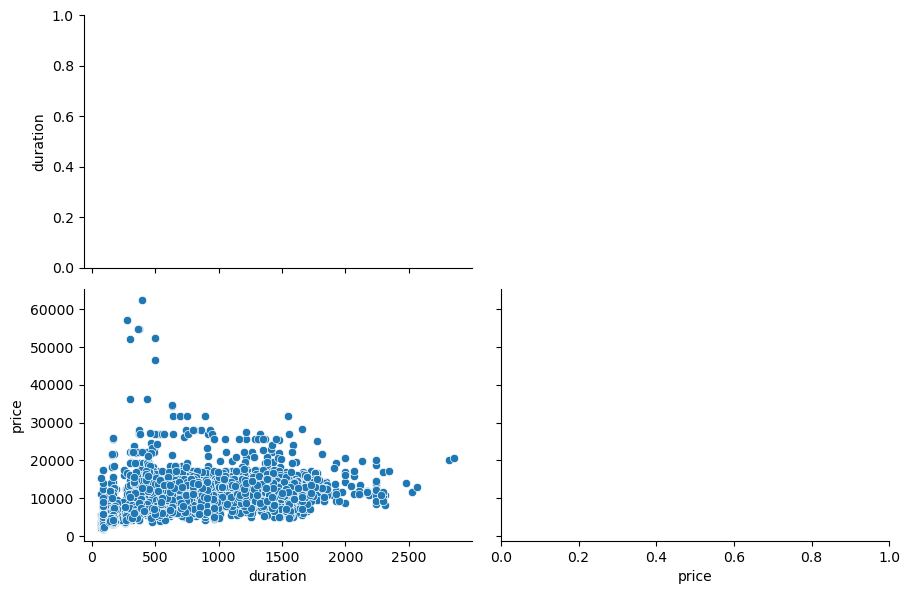

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

In [15]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


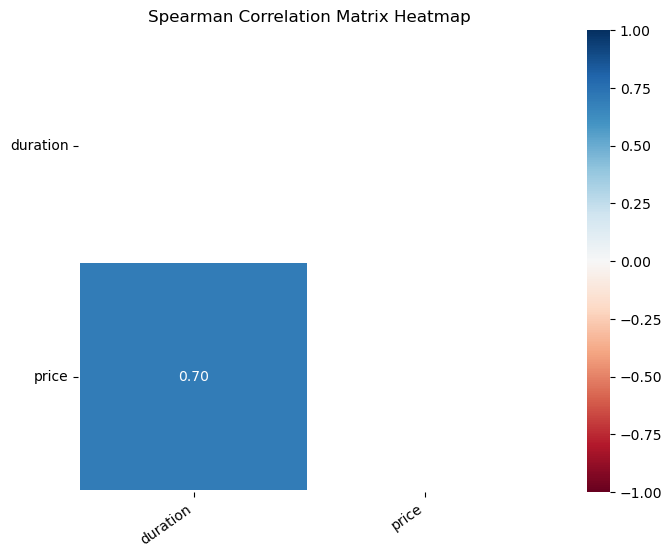

In [17]:
eda_helper_functions.correlation_heatmap(train)

In [18]:
train.corr(method="spearman",numeric_only=True)

,duration,price
duration,1.00000,0.69786
price,0.69786,1.00000


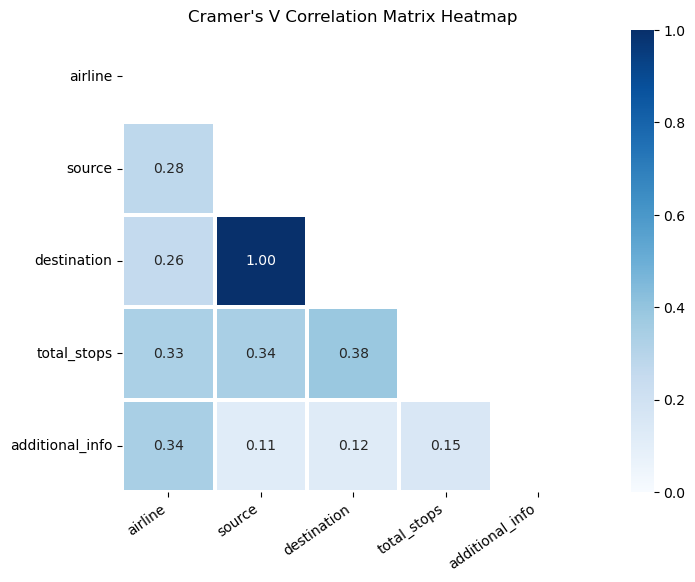

In [19]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [20]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline 

In [21]:
eda_helper_functions.cat_summary(train,"airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357132
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,736,0.109933
Spicejet,537,0.080209
Vistara,322,0.048096
Air Asia,211,0.031516
Goair,125,0.018671
Trujet,1,0.000149


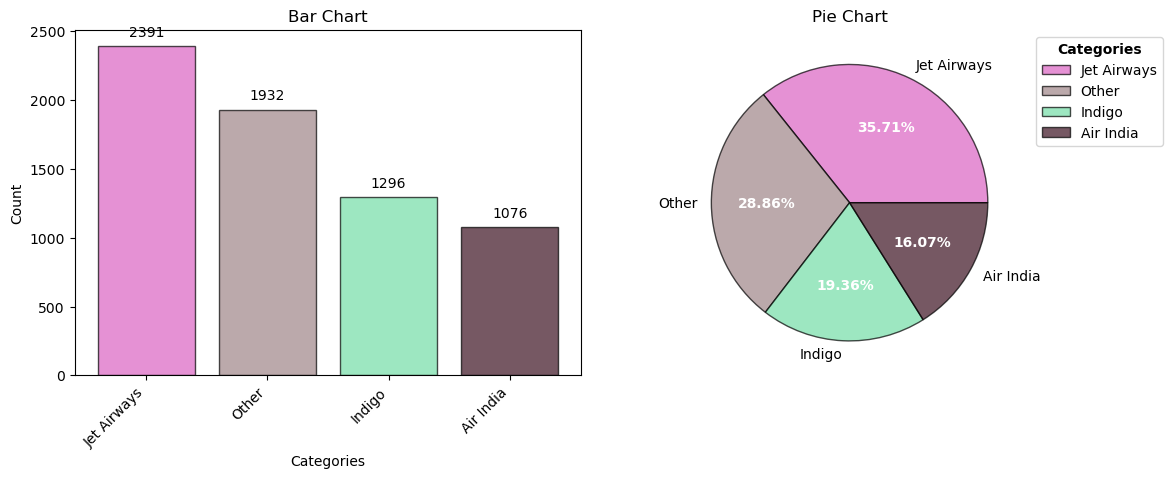

In [22]:
eda_helper_functions.cat_univar_plots(train,'airline',show_wordcloud=False,k=3)

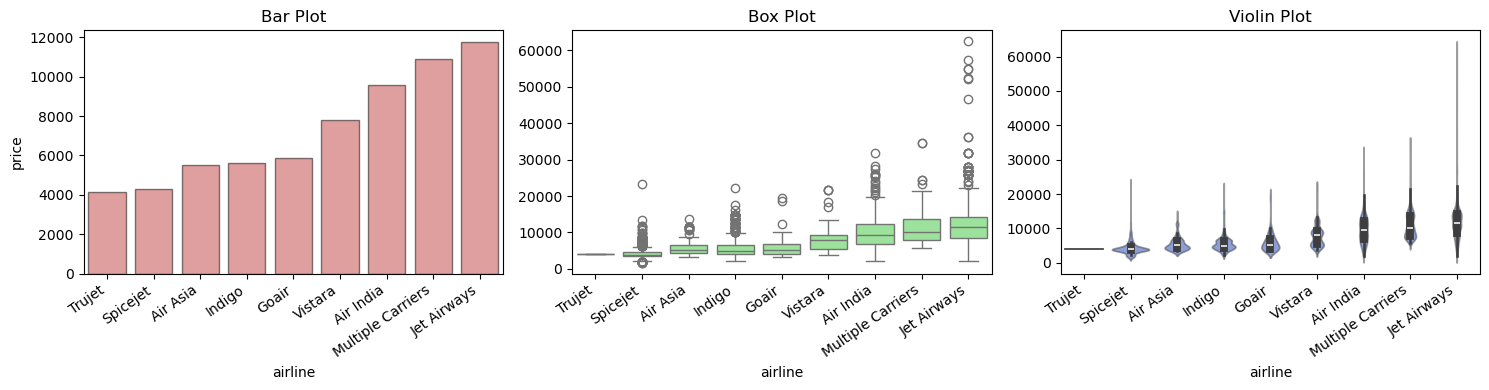

In [23]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [24]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.280702706463
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3131.4120748217883
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


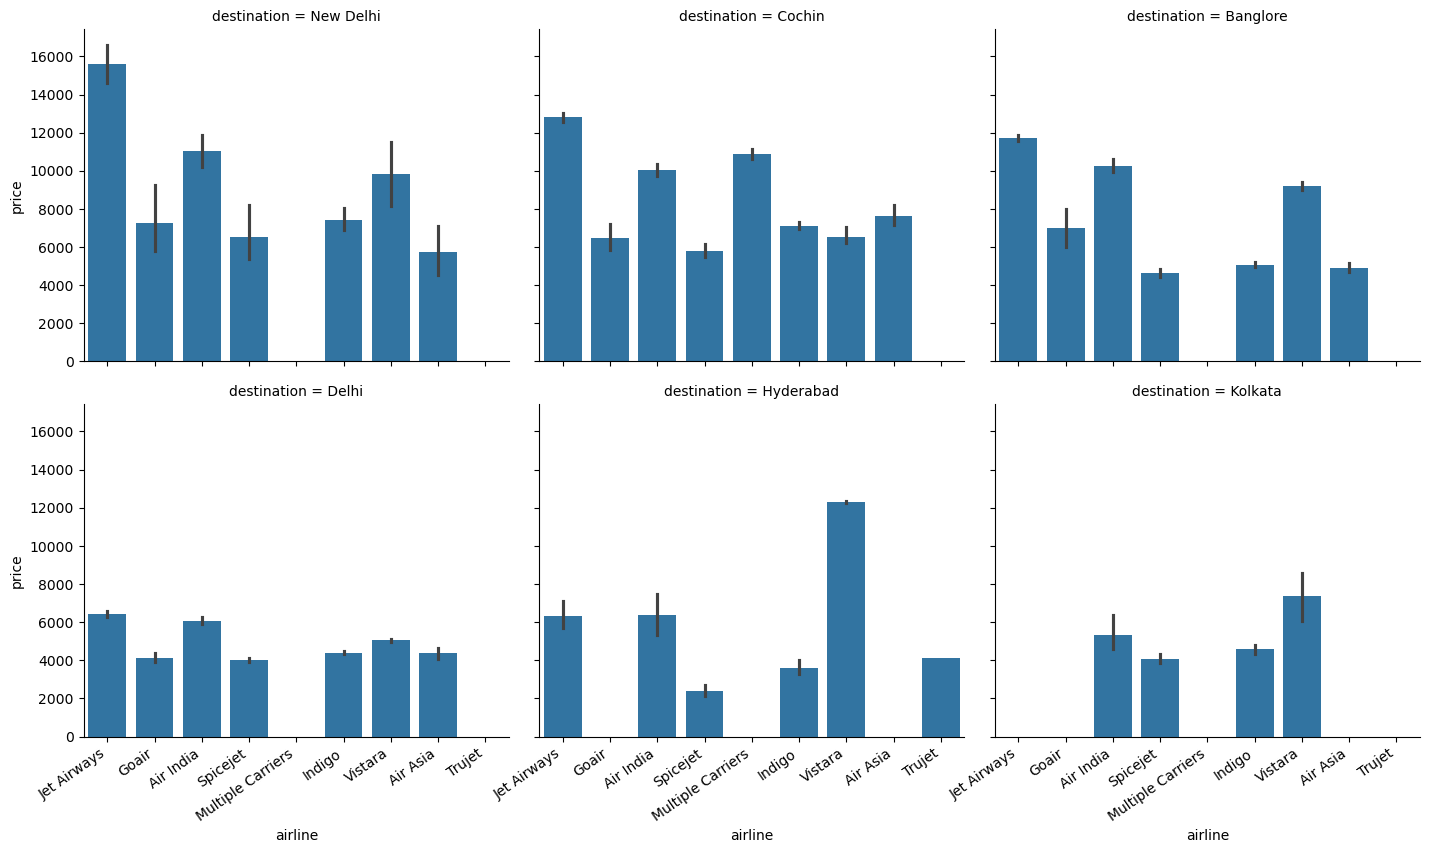

In [25]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 Date_of_journey

In [26]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

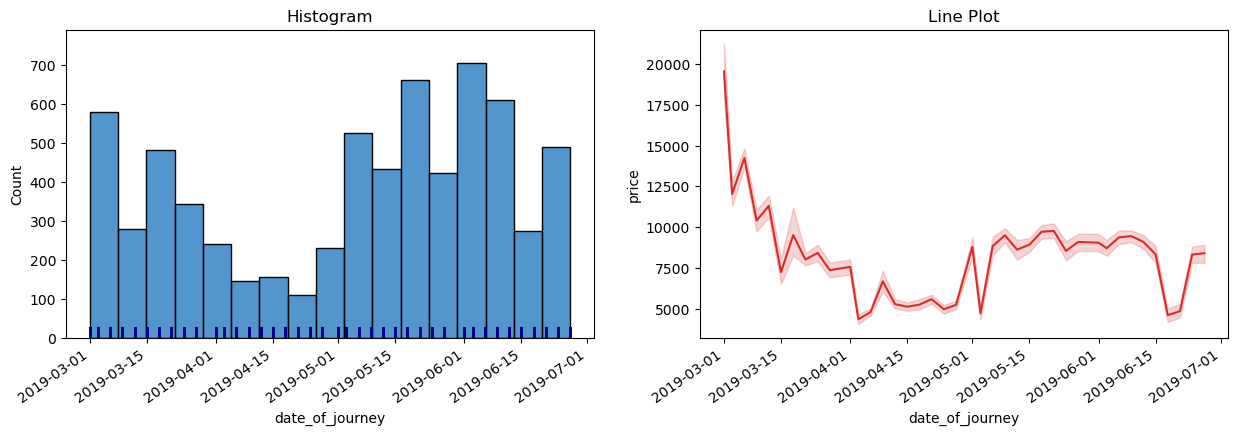

In [27]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

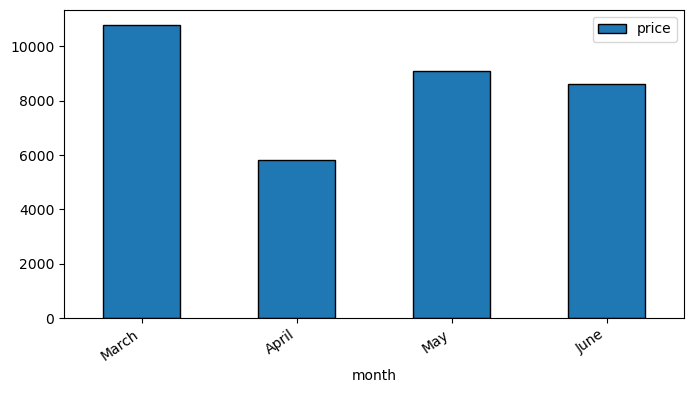

In [28]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

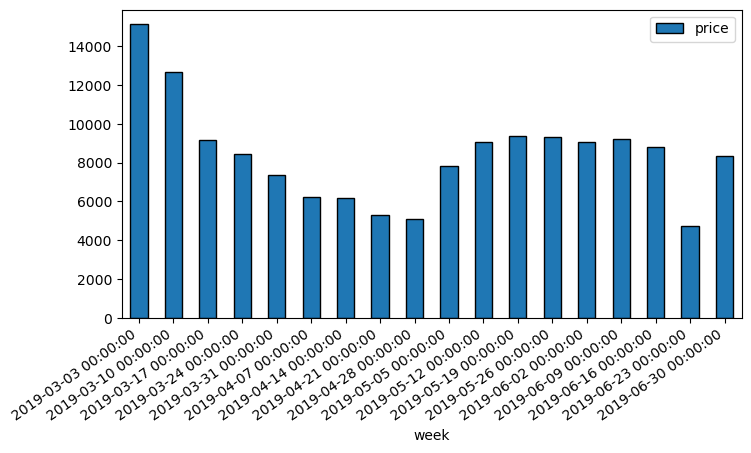

In [29]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

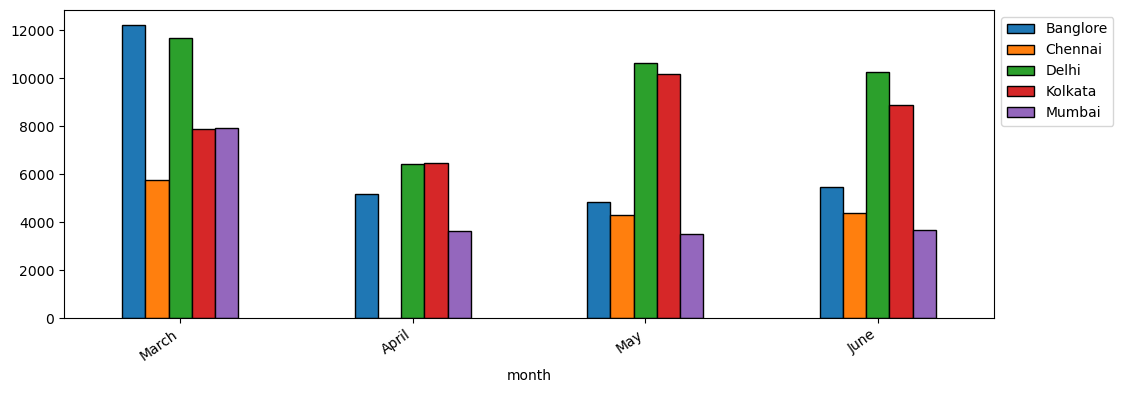

In [30]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 Dep_Time

In [31]:
train.dep_time

0      2024-06-07 08:55:00
1      2024-06-07 17:30:00
2      2024-06-07 11:40:00
3      2024-06-07 09:25:00
4      2024-06-07 22:55:00
               ...        
6690   2024-06-07 10:45:00
6691   2024-06-07 09:25:00
6692   2024-06-07 14:00:00
6693   2024-06-07 07:55:00
6694   2024-06-07 11:50:00
Name: dep_time, Length: 6695, dtype: datetime64[ns]

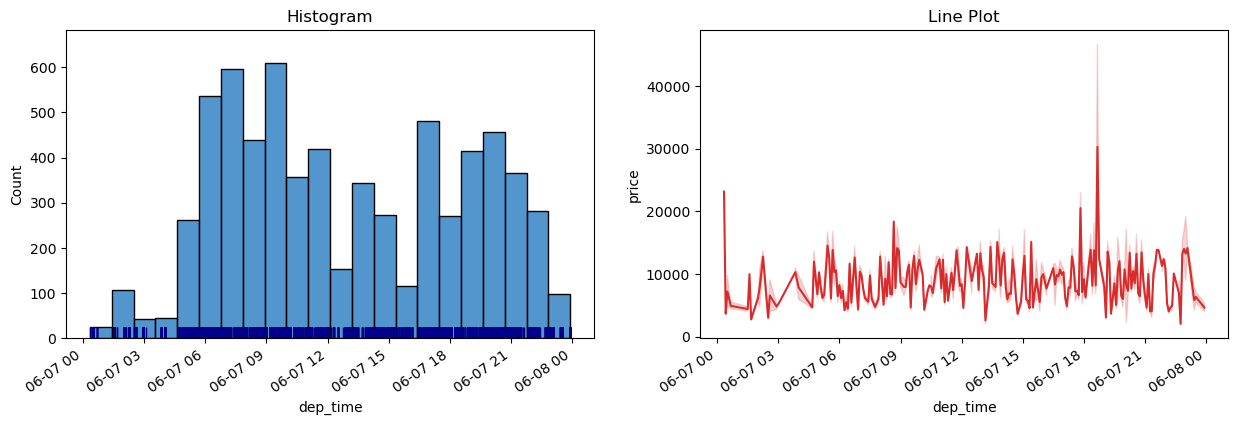

In [32]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")


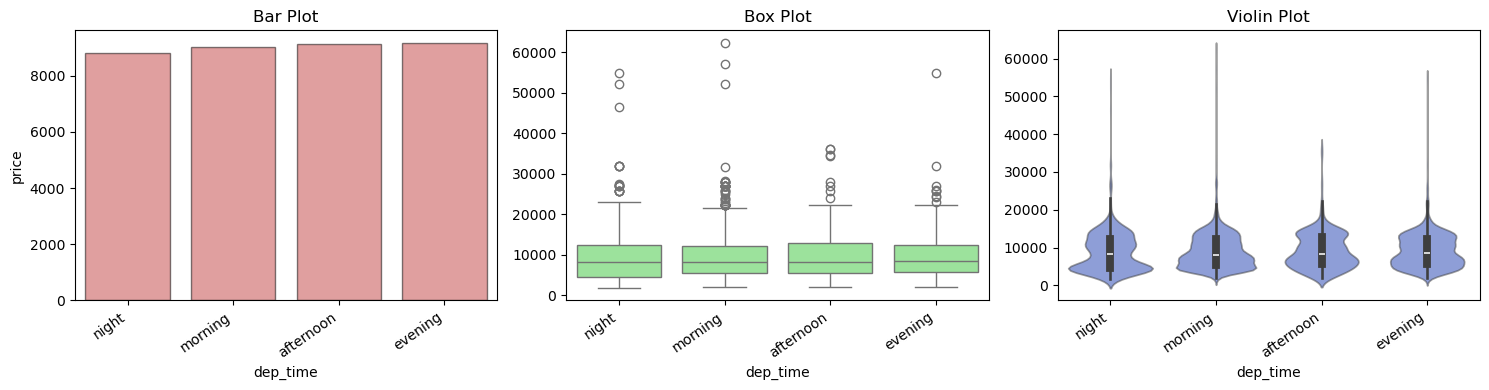

In [33]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [34]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [37]:
eda_helper_functions.num_summary(train,"duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865603804588318
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


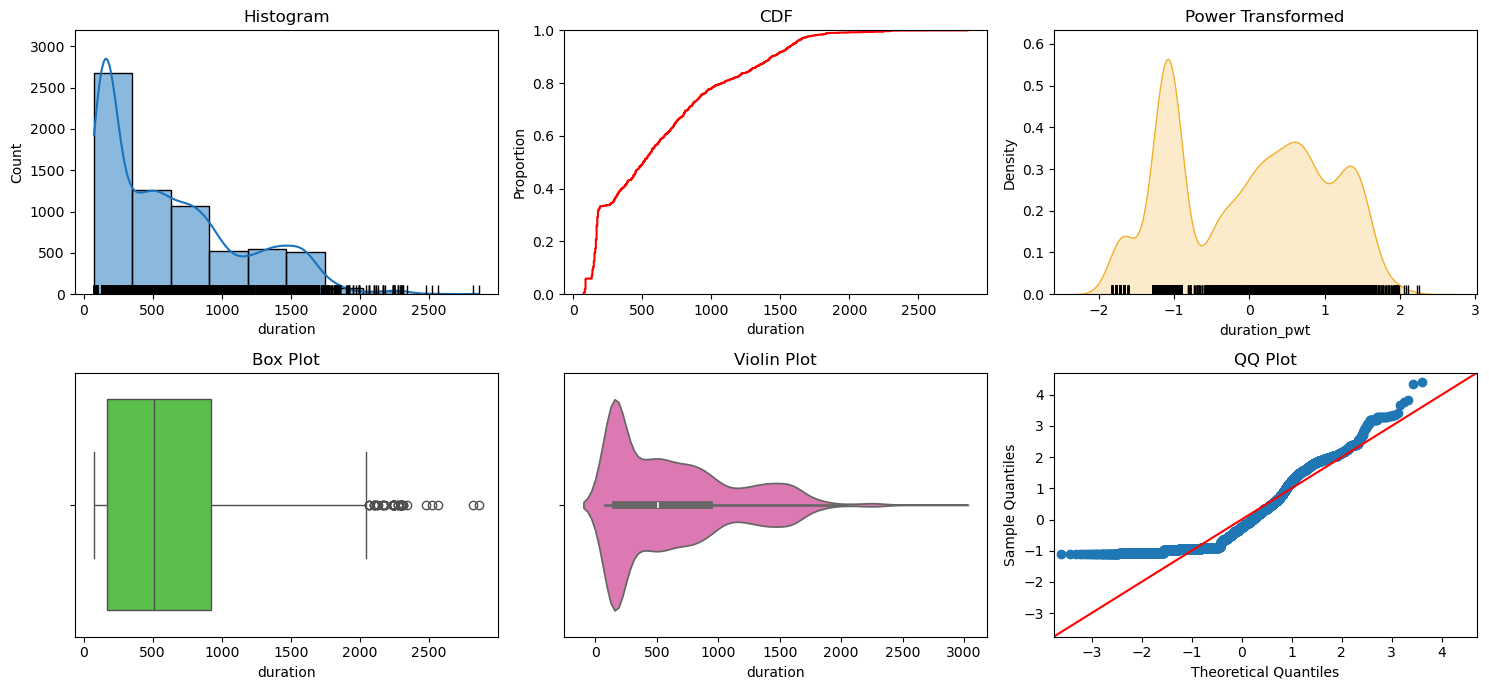

In [38]:
eda_helper_functions.num_univar_plots(train, "duration")

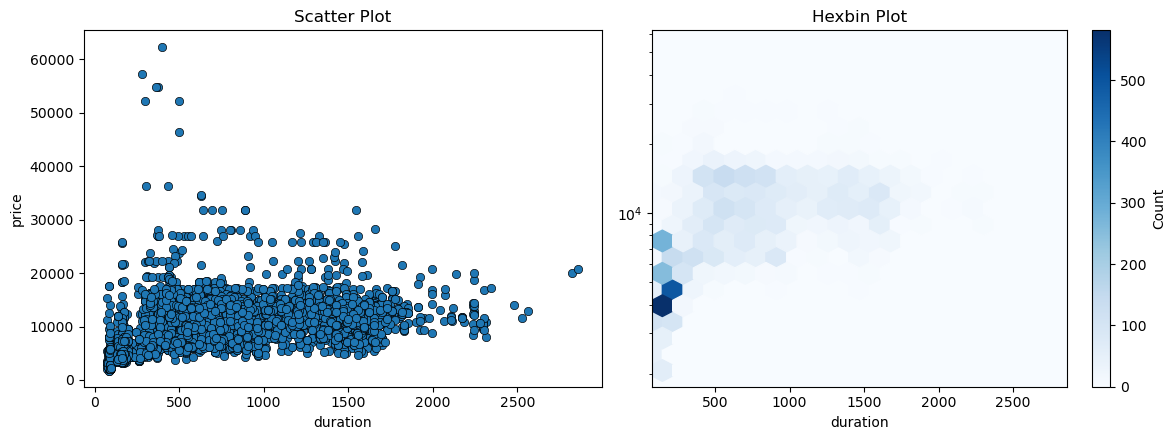

In [39]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [40]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5090124491779021
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


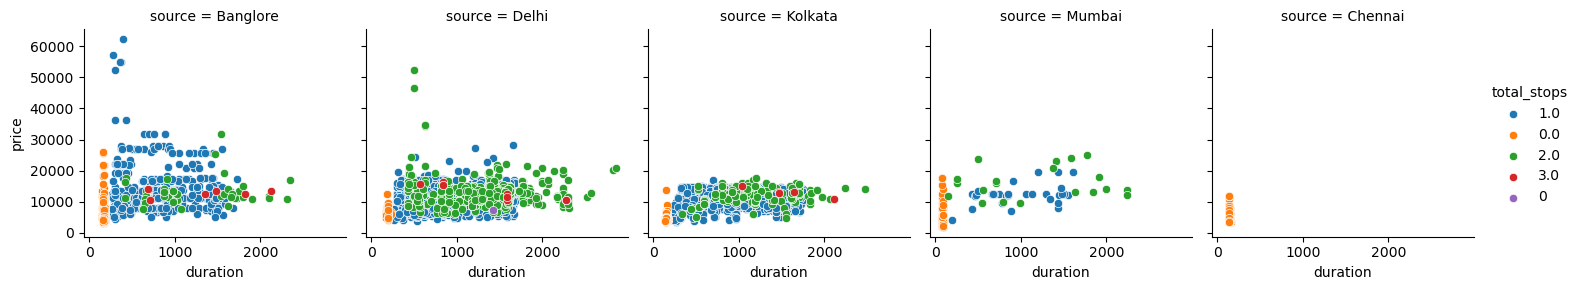

In [41]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

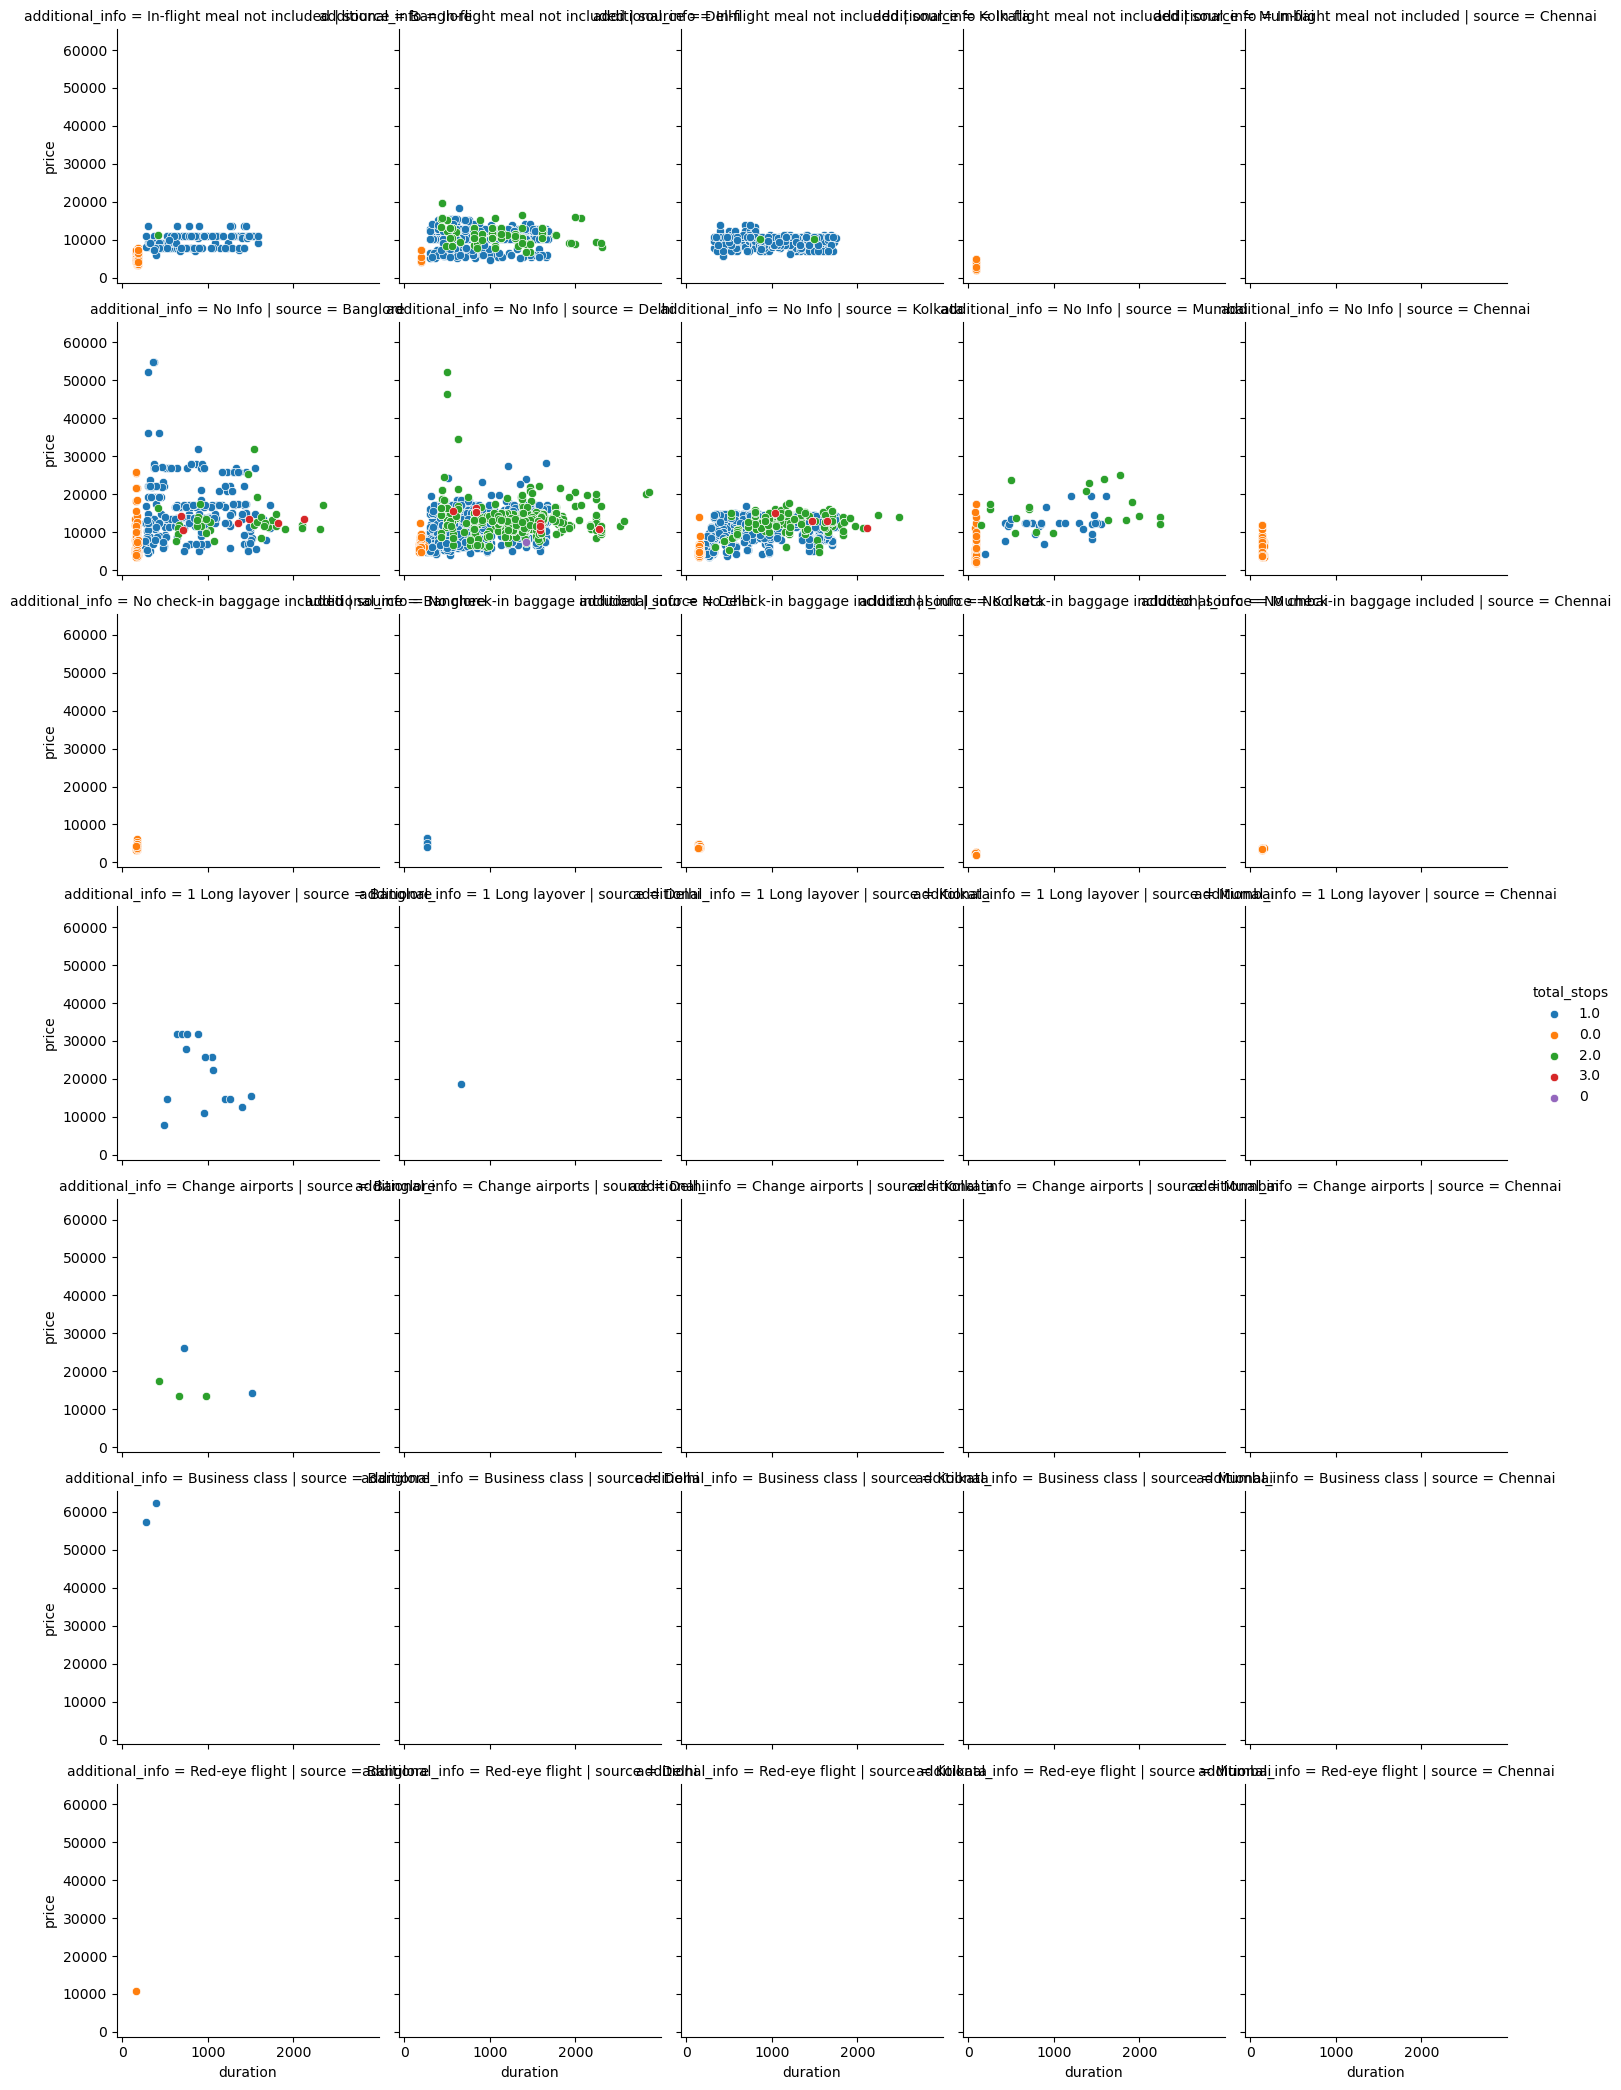

In [42]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

### 8.5 additional_info

In [51]:
train.additional_info

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

In [54]:
eda_helper_functions.cat_summary(train,"additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,7
top,No Info
freq,5249


,count,percentage
category,,
No Info,5249,0.784018
In-flight meal not included,1215,0.181479
No check-in baggage included,207,0.030919
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


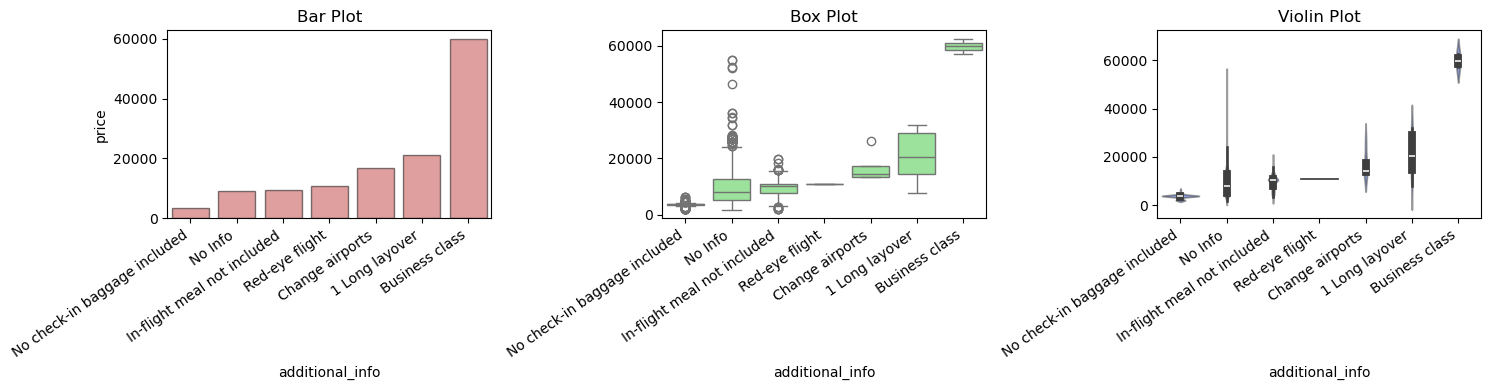

In [55]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

## 9.Automated EDA

In [44]:
#!pip install ydata_profiling

     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/109.0 kB 1.4 MB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.0 kB 825.8 kB/s eta 0:00:01
     -------------------------------------- 109.0/109.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   ----------------- ---------------------- 153.6/359.5 kB 4.5 MB/s eta 0:00:01
   ------------------------------------ --- 327.7/359.5 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 359.5/359.5 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   ------------------------------ -------- 522.2/667

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.7.3 which is incompatible.


In [45]:
from ydata_profiling import ProfileReport

In [50]:
report = ProfileReport(train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]